<h1><center>KAATRU - IIT MADRAS</center></h1>
<h2><center>Data Scientist: Assessment Round 1</center></h2>


### Submitted By:

#### Anuvarshini.S.P,
#### B.Tech in Artificial Intelligence.
#### Resume:[Resume Link](https://drive.google.com/file/d/1-Sk6H9UynWOJVZ0Za9iYU1nlf7vJ8G7x/view?usp=sharing)

# <font color='black'> INDEX </font>
## <a href='#import'> 1. Importing Libraries </a>
## <a href='#goal'> 2. Objective </a>
## <a href='#data'> 3. Data Analysis </a>

## <a href='#featureselection'> 4. Feature Selection </a>
### > <a href='#mlr'> Implementing Multiple Linear Regression </a>

## <a href='#exp1'> 5. Features with High Correlation with target variable</a>
## <a href='#exp2'> 6. Features with Less Correlation with target variable</a>
## <a href='#inference'> 7. Inference and Observation </a>

<a id='import'></a>
## Importing Libraries

In [548]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from matplotlib import pyplot

<a id='goal'></a>
## GOAL

Develop a model to find the variables that are significant in the demand for shared bikes with the available independent variables and report appropriate metrics of your model evaluation.

## Outcome
The variables that are significant in predicting the demand for shared bikes (at least 3).


In [549]:
#read data
df = pd.read_csv('bike_count.csv')

In [550]:
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


<a id='data'></a>
## DATA ANALYSIS

In [551]:
#dropping the instant and date column as it is irrelevant in predicting the target
df = df.drop(columns=['instant','dteday'])
df

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


In [552]:
df.dtypes

season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [568]:
df.describe(include='all')

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [553]:
X_df = df.iloc[:,:-1] # input variables
y_df = df.iloc[:,-1] #target variable

## The target variable is the cnt feature in the data and all other features are input variables. 
Since the input variables and the output variable are numerical data, Pearson’s Correlation can be used.
The coefficient returns a value between -1 and 1 that represents the limits of correlation from a full negative
correlation to a full positive correlation. A value of 0 means no correlation. 

    The value must be interpreted,where often a value below -0.5 or above 0.5 indicates a notable correlation, and values
    below those values suggests a less notable correlation.

In [554]:
def scoring_function(X, y):
    scores = [pearsonr(X[col], y)[0] for col in X.columns] #function for finding pearson correlation between input and target variable
    return scores   

In [555]:
scores = scoring_function(X_df, y_df)
scores #this gives the correlation between each feature and the target variable

[0.40458378408851886,
 0.5697284652110439,
 0.27819092925924704,
 -0.06876375304749037,
 0.036182571719689714,
 -0.027639877191829955,
 -0.2959286224242958,
 0.6270440344135153,
 0.6306853489531039,
 -0.09854287912248037,
 -0.23513249514103662,
 0.6721234097443968,
 0.9454106118483708]

<a id='featureselection'></a>
 ## FEATURE SELECTION

In [556]:
def correlation(X_df,scores,temp):
    # using sorted() to sort and slice K maximum elements 
    res = []
    for ele in temp:
        # encapsulating elements with index using index()
        res.append((scores.index(ele), ele))
    print(f"{K} Selected Features : " + str(res))   
    selected = [False] * len(scores)
    for ele in res:
        selected[ele[0]] = True
    features = np.array(X_df.columns)
    X_df = X_df[features[selected]]
    return X_df

<a id='mlr'></a>
## Multiple Linear Regression

In Linear Regression, our goal is to find the best fit line from a scatter of data. The labels(output) depends on multiple features(input). The goal is to find an optimum number also called a weight for each feature so that the model can predict accurately. The equation of the line is given by:

$
y=b_{0}+b_{1}^{*} x_{1}+b_{2}{ }^{*} x_{2}+\ldots+b_{n}{ }^{*} x_{n}
$

Cost Function

$
J\left(\Theta_{0}, \Theta_{1}\right)=\frac{1}{2 m} \sum_{i=1}^{m}\left[h_{\Theta}\left(x_{i}\right)-y_{i}\right]^{^{2}}
$

Gradient Descent

$\Theta_{j}=\Theta_{j}-{\alpha} \frac{\partial}{\partial \Theta_{j}} J\left(\Theta_{0}, \Theta_{1}\right)$

$
\begin{aligned}
\frac{\partial}{\partial \Theta} J_{\Theta} &=\frac{\partial}{\partial \Theta} \frac{1}{2 m} \sum_{i=1}^{m}\left[h_{\Theta}\left(x_{i}\right)-y\right]^{2} \\
&=\frac{1}{m} \sum_{i=1}^{m}\left(h_{\Theta}\left(x_{i}\right)-y\right) \frac{\partial}{\partial \Theta_{j}}\left(\Theta x_{i}-y\right) \\
&=\frac{1}{m}\left(h_{\Theta}\left(x_{i}\right)-y\right) x_{i}
\end{aligned}
$

Therfore,

$\Theta_{j}:=\Theta_{j}-\frac{\alpha}{m} \sum_{i=1}^{m}\left[\left(h_{\Theta}\left(x_{i}\right)-y\right) x_{i}\right]$


R-Squared (R² or the coefficient of determination) is a statistical measure in a regression model that determines the proportion of variance in the dependent variable that can be explained by the independent variable. In other words, r-squared shows how well the data fit the regression model.

In [561]:
def CostFunction(x,y,w,b):
    cost = np.sum((((x.dot(w) + b) - y) ** 2) / (2*len(y)))
    return cost

def GradientDescent(x, y, w, b, learning_rate, epochs):
    cost_list = [0] * epochs
   
    for epoch in range(epochs):
        z = x.dot(w) + b
        loss = z - y
        
        weight_gradient = x.T.dot(loss) / len(y) #back propogation
        bias_gradient = np.sum(loss) / len(y)
        
        w = w - learning_rate*weight_gradient
        b = b - learning_rate*bias_gradient
  
        cost = CostFunction(x, y, w, b)
        cost_list[epoch] = cost
        
        if (epoch%(epochs/10)==0):
            print("Cost is:",cost)
        
    return w, b, cost_list

def predict(X, w, b):
    return X.dot(w) + b

def r2score(y_pred, y):
    rss = np.sum((y_pred - y) ** 2)
    tss = np.sum((y-y.mean()) ** 2)
    r2 = 1 - (rss / tss)
    return r2

def train(X_df,y_df):
    sc = StandardScaler()
    X_df = sc.fit_transform(X_df)
    # split into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.33, random_state=1)
    print("Train data size: ",X_train.shape,y_train.shape)
    print("Test data size: ",X_test.shape,y_test.shape)
    w, b, c= GradientDescent(X_train, y_train, np.zeros(X_train.shape[1]), 0, 0.002,epochs=10000)
    # different values of epochs have been tried like 1000,500,700, 5000,10000, out of which 10000 gave the best result
    y_pred = predict(X_test, w, b)
    acc = r2score(y_pred, y_test)*100
    pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
    #A regression plot is useful to understand the linear relationship between two parameters. 
    plt.scatter(y_test,y_pred)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title("Test vs Predicted")
    plt.show()
    return w,b,c,acc,pred_df

<a id='exp1'></a>
## Features with High Correlation with target variable.
Here we take the 3 highly correlated features with the target variable.

In [562]:
K=3
temp = sorted(scores)[-K:]
X_df_1 = correlation(X_df,scores,temp)
X_df_1

3 Selected Features : [(8, 0.6306853489531039), (11, 0.6721234097443968), (12, 0.9454106118483708)]


,atemp,casual,registered
0,18.18125,331,654
1,17.68695,131,670
2,9.47025,120,1229
3,10.60610,108,1454
4,11.46350,82,1518
...,...,...,...
725,11.33210,247,1867
726,12.75230,644,2451
727,12.12000,159,1182
728,11.58500,364,1432


In [563]:
X_arr = X_df_1.values
y_arr = y_df.values

Train data size:  (489, 3) (489,)
Test data size:  (241, 3) (241,)
Cost is: 12214507.908351332
Cost is: 236765.45030544553
Cost is: 13497.875500443595
Cost is: 1885.7433369303774
Cost is: 334.86681405815267
Cost is: 61.77552177009973
Cost is: 11.488380108428714
Cost is: 2.142125942935091
Cost is: 0.3998470531822883
Cost is: 0.07466925132371005


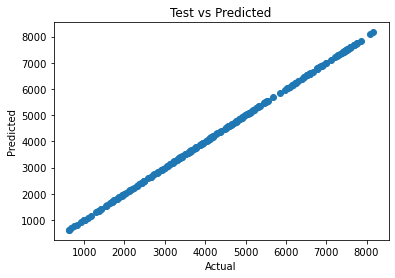

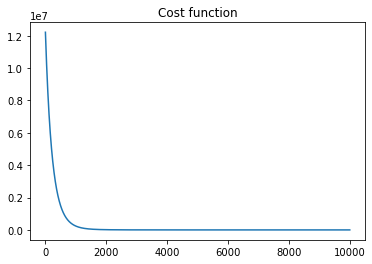

Accuracy:  99.99999936511948


,Actual Value,Predicted Value,Difference
0,2710,2710.224520,-0.224520
1,3894,3894.064556,-0.064556
2,3915,3915.412387,-0.412387
3,7466,7465.824321,0.175679
4,6591,6590.899287,0.100713
...,...,...,...
236,5459,5458.794129,0.205871
237,2802,2801.909267,0.090733
238,4035,4034.964312,0.035688
239,6304,6303.740173,0.259827


In [564]:
w,b,c,acc,pred_df=train(X_arr,y_arr)
plt.plot(c)
plt.title("Cost function")
plt.show()

print("Accuracy: ",acc)
pred_df

<a id='exp2'></a>
## Features with Less Correlation with target variable.

Here we take the 3 less correlated features with the target variable.

In [565]:
K=3
temp = sorted(scores)[:K]
X_df_2 = correlation(X_df,scores,temp)
X_df_2

3 Selected Features : [(6, -0.2959286224242958), (10, -0.23513249514103662), (9, -0.09854287912248037)]


,weathersit,hum,windspeed
0,2,80.5833,10.749882
1,2,69.6087,16.652113
2,1,43.7273,16.636703
3,1,59.0435,10.739832
4,1,43.6957,12.522300
...,...,...,...
725,2,65.2917,23.458911
726,2,59.0000,10.416557
727,2,75.2917,8.333661
728,1,48.3333,23.500518


Train data size:  (489, 3) (489,)
Test data size:  (241, 3) (241,)
Cost is: 12228357.54347066
Cost is: 1749452.9611619783
Cost is: 1559262.0841162174
Cost is: 1555787.800780979
Cost is: 1555722.8819853552
Cost is: 1555721.2316814393
Cost is: 1555721.059020802
Cost is: 1555721.0122330147
Cost is: 1555720.998020702
Cost is: 1555720.9936719355


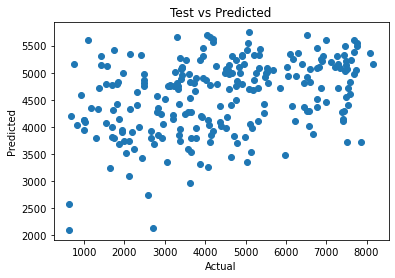

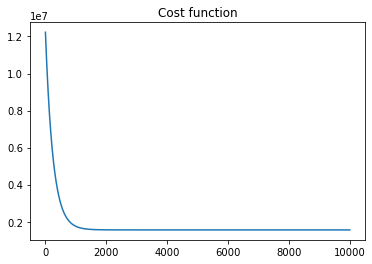

Accuracy:  12.505878400279869


,Actual Value,Predicted Value,Difference
0,2710,2140.398957,569.601043
1,3894,4195.956528,-301.956528
2,3915,4186.535058,-271.535058
3,7466,5487.663181,1978.336819
4,6591,4834.791228,1756.208772
...,...,...,...
236,5459,4250.805638,1208.194362
237,2802,4276.880709,-1474.880709
238,4035,5692.036536,-1657.036536
239,6304,5365.480865,938.519135


In [566]:
X_arr1 = X_df_2.values
w,b,c,acc,pred_df=train(X_arr1,y_arr)
plt.plot(c)
plt.title("Cost function")
plt.show()

print("Accuracy: ",acc)
pred_df

<a id='inference'> </a>
## Inference and Observation 

When all the features are taken into consideration, there are few features that does not contribute much to the prediction of the 'cnt' variable. Thus, Pearson Correlation method is used to select the best 3 features among all features.
This correlation method gives the correlation between the particular input variable and the target variable which is 'cnt' in our case.

    For the first experiment, 3 highly correlated features are taken into account and multiple linear regression is
    performed which gave an accuracy of 99.99%. The features considered are: [atemp,casual,registered]

    For the second experiment, 3 least correlated features are taken into account and multiple linear regression is 
    performed which gave an accuracy of 12.50%. It can also be observed from the scatter plot that the model performs badly
    due to the less contributing features. The features considered are: [weathersit,hum,windspeed]
    
From both the above experiments, it can be concluded that selecting the most relevant features for the prediction of target variable is the most important for building a good model.

## The variables that are significant in predicting the demand for shared bikes [cnt] are [atemp,casual,registered].